In [ ]:
from google.colab import files


uploaded = files.upload()


Saving sales_data.csv to sales_data (3).csv


In [ ]:
import pandas as pd
import io

df = pd.read_csv(io.BytesIO(uploaded['sales_data (3).csv']))
print(df)


     order_id  order_date  customer_id  product_id product_category  \
0           1  2023-01-01         1052        2034             Toys   
1           2  2023-01-02         1093        2008      Electronics   
2           3  2023-01-03         1015        2040             Toys   
3           4  2023-01-04         1072        2083             Toys   
4           5  2023-01-05         1061        2042      Electronics   
..        ...         ...          ...         ...              ...   
995       996  2025-09-22         1010        2086         Clothing   
996       997  2025-09-23         1067        2051      Electronics   
997       998  2025-09-24         1018        2088             Home   
998       999  2025-09-25         1100        2041             Toys   
999      1000  2025-09-26         1086        2017            Books   

     product_price  quantity  total_amount  
0           171.81         2        343.62  
1           380.81         1        380.81  
2           

In [ ]:
print("Типы данных в колонках:")
print(df.dtypes)


Типы данных в колонках:
order_id              int64
order_date           object
customer_id           int64
product_id            int64
product_category     object
product_price       float64
quantity              int64
total_amount        float64
dtype: object


In [ ]:
print("Наличие дубликатов:")
print(df.duplicated().any())

Наличие дубликатов:
False


In [ ]:
print("Пропущенные значения:")
print(df.isnull().values.any())

Пропущенные значения:
False


In [ ]:
unique_order_ids = len(df['order_id'].unique())
print("Количество заказов:", unique_order_ids)

Количество заказов: 1000


In [ ]:
total_sales = df['total_amount'].sum()
orders_count = len(df['order_id'].unique())
average_check = total_sales / orders_count
print("Общая сумма продаж:", total_sales)
print("Количество заказов:", orders_count)
print("Средний чек:", average_check)

Общая сумма продаж: 647223.45
Количество заказов: 1000
Средний чек: 647.22345


In [ ]:
df['order_date'] = pd.to_datetime(df['order_date'])
grouped_data = df.groupby([df['order_date'].dt.month]).agg({'quantity': 'sum', 'total_amount': 'sum'})
grouped_data.index.name = 'Month'
grouped_data.reset_index(inplace=True)
grouped_data.columns = ['Month', 'Total Quantity', 'Total Amount']
print(grouped_data)


    Month  Total Quantity  Total Amount
0       1             220      61843.87
1       2             197      53567.09
2       3             245      66405.32
3       4             234      59945.34
4       5             237      63892.17
5       6             232      58638.76
6       7             241      67413.35
7       8             243      53058.17
8       9             206      46847.15
9      10             157      42243.83
10     11             152      36129.88
11     12             149      37238.52


In [ ]:
grouped_data.to_excel('продажи_по_месяцам.xlsx', index=False)

In [ ]:
path_to_file = '/content/продажи_по_месяцам.xlsx'
df1 = pd.read_excel(path_to_file)
df1.head()

,Month,Total Quantity,Total Amount
0,1,220,61843.87
1,2,197,53567.09
2,3,245,66405.32
3,4,234,59945.34
4,5,237,63892.17


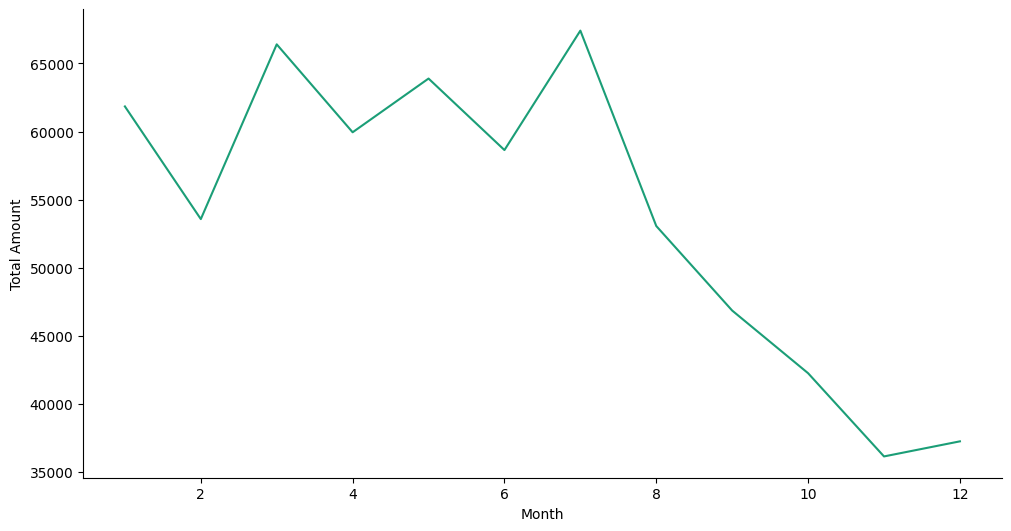

In [ ]:
# @title Month vs Total Amount

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Month']
  ys = series['Total Amount']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df1_sorted = df1.sort_values('Month', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Month')
_ = plt.ylabel('Total Amount')

In [ ]:
print (df.head)

<bound method NDFrame.head of      order_id order_date  customer_id  product_id product_category  \
0           1 2023-01-01         1052        2034             Toys   
1           2 2023-01-02         1093        2008      Electronics   
2           3 2023-01-03         1015        2040             Toys   
3           4 2023-01-04         1072        2083             Toys   
4           5 2023-01-05         1061        2042      Electronics   
..        ...        ...          ...         ...              ...   
995       996 2025-09-22         1010        2086         Clothing   
996       997 2025-09-23         1067        2051      Electronics   
997       998 2025-09-24         1018        2088             Home   
998       999 2025-09-25         1100        2041             Toys   
999      1000 2025-09-26         1086        2017            Books   

     product_price  quantity  total_amount  
0           171.81         2        343.62  
1           380.81         1        380

In [ ]:
unique_customers = len(df['customer_id'].unique())
print("Всего клиентов:", unique_customers)

Всего клиентов: 100


In [ ]:
customer_counts = df['customer_id'].value_counts()
print("Уникальные_клиенты:")
for customer, count in customer_counts.items():
    print(f"- {customer}: {count}")

Уникальные_клиенты:
- 1090: 20
- 1062: 19
- 1092: 19
- 1099: 18
- 1033: 18
- 1001: 16
- 1086: 15
- 1058: 15
- 1017: 15
- 1089: 14
- 1024: 14
- 1019: 14
- 1012: 13
- 1008: 13
- 1051: 13
- 1023: 13
- 1096: 13
- 1063: 13
- 1016: 13
- 1002: 13
- 1036: 12
- 1039: 12
- 1047: 12
- 1054: 12
- 1061: 12
- 1032: 12
- 1052: 12
- 1075: 12
- 1069: 12
- 1003: 12
- 1004: 11
- 1093: 11
- 1005: 11
- 1027: 11
- 1048: 11
- 1060: 11
- 1053: 11
- 1035: 10
- 1028: 10
- 1095: 10
- 1074: 10
- 1015: 10
- 1025: 10
- 1021: 10
- 1067: 10
- 1087: 10
- 1013: 10
- 1059: 10
- 1030: 10
- 1044: 10
- 1038: 10
- 1009: 10
- 1014: 10
- 1056: 9
- 1045: 9
- 1097: 9
- 1057: 9
- 1026: 9
- 1050: 9
- 1018: 9
- 1088: 9
- 1100: 9
- 1034: 9
- 1064: 9
- 1049: 9
- 1042: 9
- 1085: 8
- 1072: 8
- 1076: 8
- 1066: 8
- 1080: 8
- 1007: 8
- 1094: 8
- 1084: 8
- 1029: 8
- 1065: 8
- 1006: 8
- 1078: 8
- 1037: 7
- 1073: 7
- 1046: 7
- 1020: 7
- 1098: 7
- 1070: 7
- 1081: 7
- 1082: 7
- 1055: 7
- 1077: 7
- 1071: 6
- 1022: 6
- 1079: 6
- 1010: 6
- 1091:

In [ ]:
grouped_data = df.groupby('customer_id').agg({'quantity': 'sum', 'total_amount': 'sum'})
for customer, (quantity_sum, total_amount_sum) in grouped_data.iterrows():
    print(f"Для клиента {customer}:")
    print(f"- Количество_продаж: {quantity_sum}")
    print(f"- Сумма_продаж: {total_amount_sum}")
    print("-"  *  80)

Для клиента 1001:
- Количество_продаж: 43.0
- Сумма_продаж: 10043.92
--------------------------------------------------------------------------------
Для клиента 1002:
- Количество_продаж: 33.0
- Сумма_продаж: 9140.44
--------------------------------------------------------------------------------
Для клиента 1003:
- Количество_продаж: 30.0
- Сумма_продаж: 7118.67
--------------------------------------------------------------------------------
Для клиента 1004:
- Количество_продаж: 29.0
- Сумма_продаж: 7403.57
--------------------------------------------------------------------------------
Для клиента 1005:
- Количество_продаж: 32.0
- Сумма_продаж: 9799.59
--------------------------------------------------------------------------------
Для клиента 1006:
- Количество_продаж: 21.0
- Сумма_продаж: 6601.0
--------------------------------------------------------------------------------
Для клиента 1007:
- Количество_продаж: 23.0
- Сумма_продаж: 5273.610000000001
----------------------------

In [ ]:
grouped_data.to_excel('продажи_по_клиентам.xlsx', index=False)

In [ ]:
unique_product_ids = df['product_id'].unique()
print(unique_product_ids)


[2034 2008 2040 2083 2042 2041 2006 2052 2026 2064 2098 2059 2056 2070
 2033 2053 2022 2021 2004 2094 2075 2062 2095 2024 2055 2009 2003 2031
 2036 2066 2084 2092 2079 2051 2057 2045 2044 2005 2068 2019 2097 2020
 2012 2047 2001 2090 2014 2038 2037 2011 2100 2077 2050 2010 2023 2002
 2013 2065 2063 2073 2017 2015 2035 2049 2069 2060 2078 2076 2099 2093
 2072 2030 2085 2089 2018 2039 2032 2025 2067 2007 2029 2027 2086 2074
 2088 2043 2046 2082 2054 2087 2091 2071 2028 2081 2061 2096 2016 2048
 2058 2080]


In [ ]:
unique_values = df['product_id'].value_counts().to_dict()
for product, count in unique_values.items():
    print(f'{product}: {count}')


2040: 18
2029: 18
2098: 18
2017: 16
2059: 16
2062: 16
2051: 15
2025: 15
2026: 15
2038: 15
2011: 14
2094: 14
2087: 13
2047: 13
2088: 13
2060: 13
2005: 13
2093: 13
2072: 13
2064: 13
2015: 12
2032: 12
2063: 12
2037: 12
2009: 12
2099: 12
2039: 11
2006: 11
2046: 11
2013: 11
2082: 11
2003: 11
2070: 11
2033: 11
2053: 11
2012: 11
2014: 10
2020: 10
2027: 10
2001: 10
2036: 10
2097: 10
2068: 10
2049: 10
2045: 10
2057: 10
2092: 10
2055: 10
2075: 10
2081: 10
2042: 10
2002: 10
2035: 9
2078: 9
2030: 9
2007: 9
2089: 9
2010: 9
2086: 9
2071: 9
2056: 9
2022: 9
2054: 9
2095: 9
2024: 9
2066: 9
2079: 9
2018: 9
2074: 9
2090: 9
2008: 9
2067: 8
2096: 8
2034: 8
2100: 8
2085: 8
2084: 8
2073: 8
2041: 8
2004: 8
2048: 7
2083: 7
2021: 7
2076: 7
2031: 7
2019: 7
2077: 7
2023: 7
2043: 6
2044: 6
2050: 6
2052: 6
2061: 6
2065: 6
2069: 6
2091: 5
2016: 5
2058: 5
2080: 5
2028: 3


In [ ]:
df_grouped = df.groupby(['customer_id', 'product_id'])
result = df_grouped['product_id'].count()
result.rename('количество повторных покупок', inplace=True)
print(result)

customer_id  product_id
1001         2009          1
             2012          1
             2024          1
             2032          1
             2035          1
                          ..
1100         2059          1
             2061          1
             2062          2
             2073          1
             2082          1
Name: количество повторных покупок, Length: 951, dtype: int64


In [ ]:
df_grouped = df.groupby('product_id')
result = df_grouped['quantity'].sum().sort_values(ascending=False)
result.rename('количество покупок каждого товара', inplace=True)
print(result)

product_id
2098    55
2025    50
2040    48
2011    47
2026    44
        ..
2058    13
2091    12
2016    11
2080     6
2028     5
Name: количество покупок каждого товара, Length: 100, dtype: int64


In [ ]:
grouped_data = df.groupby('product_category').agg({'quantity': 'sum', 'total_amount': 'sum'})
for category, (quantity_sum, total_amount_sum) in grouped_data.iterrows():
    print(f"Категория продукта: {category}")
    print(f"\tВсего продаж по категориям: {quantity_sum}")
    print(f"\tСумма продаж по категориям: {total_amount_sum}")
    print("-"  *  80)
grouped_data.to_excel('продажи_по_категориям.xlsx', index=False)


Категория продукта: Books
	Всего продаж по категориям: 522.0
	Сумма продаж по категориям: 121176.59
--------------------------------------------------------------------------------
Категория продукта: Clothing
	Всего продаж по категориям: 410.0
	Сумма продаж по категориям: 106494.25
--------------------------------------------------------------------------------
Категория продукта: Electronics
	Всего продаж по категориям: 499.0
	Сумма продаж по категориям: 124910.48
--------------------------------------------------------------------------------
Категория продукта: Home
	Всего продаж по категориям: 508.0
	Сумма продаж по категориям: 141265.69
--------------------------------------------------------------------------------
Категория продукта: Toys
	Всего продаж по категориям: 574.0
	Сумма продаж по категориям: 153376.44
--------------------------------------------------------------------------------


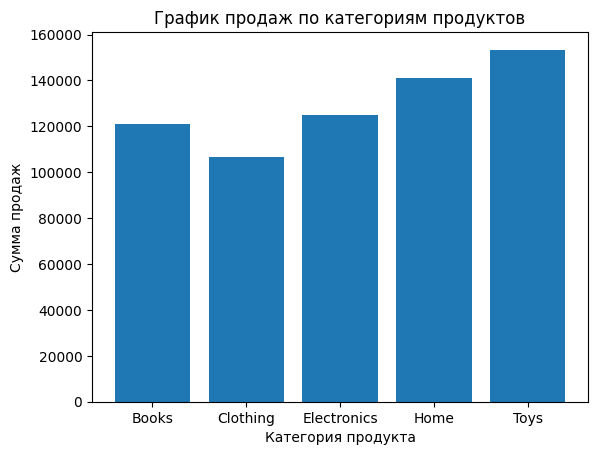

In [ ]:
import matplotlib.pyplot as plt
grouped_data = df.groupby(['product_category']).agg({'total_amount': 'sum'})
plt.bar(grouped_data.index, grouped_data['total_amount'])
plt.xlabel('Категория продукта')
plt.ylabel('Сумма продаж')
plt.title('График продаж по категориям продуктов')
plt.show()